In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [4]:
%matplotlib inline

In [5]:
import matplotlib
import matplotlib.pyplot as plt

In [6]:
X, y = mnist['data'], mnist['target']

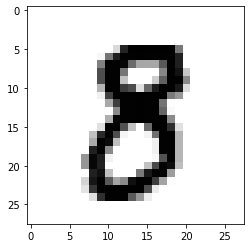

In [33]:
random_digit = X[3581]
random_digit = random_digit.reshape(28, 28) # reshape into a 28 x 28 2D array
plt.imshow(random_digit, cmap=matplotlib.cm.binary, interpolation='nearest')

In [13]:
X_train, X_test = X[:6000], X[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]

In [14]:
# shuffle training data
import numpy as np
shuffle_index = np.random.permutation(6000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [15]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf = LogisticRegression(
    max_iter=10000,
    solver='liblinear',
)

In [41]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
clf.predict(X_train[415].reshape(1,-1))


array(['0'], dtype=object)

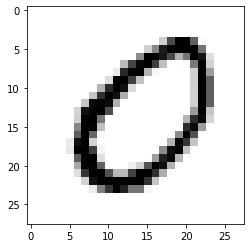

In [47]:
random_digit = X_train[415]
random_digit = random_digit.reshape(28, 28) # reshape into a 28 x 28 2D array
plt.imshow(random_digit, cmap=matplotlib.cm.binary, interpolation='nearest')

In [51]:
# Score
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
a.mean()

0.8348333333333332

In [53]:
from sklearn import svm

In [54]:
clf = svm.SVC()

In [55]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
y_pred = clf.predict(X_train[415].reshape(1,-1))

In [59]:
y_pred

array(['0'], dtype=object)

In [60]:
a = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
a.mean()

0.9518333333333332

In [61]:
a = cross_val_score(clf, X_test, y_test, cv=3, scoring='accuracy')
a.mean()

0.9039788291285298